# Analysing Melbourne's Pedestrian Data

The website data.melbourne.vic.gov.au provides pedestrian count data updated hourly in various locations around the city. Here I am loading the data from the website and analysing the data using Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://data.melbourne.vic.gov.au/api/views/cb85-mn2u/rows.csv')

In [2]:
df.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,1,01-JUN-2009 00:00,2009,June,1,Monday,0,4,Town Hall (West),194
1,2,01-JUN-2009 00:00,2009,June,1,Monday,0,17,Collins Place (South),21
2,3,01-JUN-2009 00:00,2009,June,1,Monday,0,18,Collins Place (North),9
3,4,01-JUN-2009 00:00,2009,June,1,Monday,0,16,Australia on Collins,39
4,5,01-JUN-2009 00:00,2009,June,1,Monday,0,2,Bourke Street Mall (South),28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878465 entries, 0 to 1878464
Data columns (total 10 columns):
ID               int64
Date_Time        object
Year             int64
Month            object
Mdate            int64
Day              object
Time             int64
Sensor_ID        int64
Sensor_Name      object
Hourly_Counts    int64
dtypes: int64(6), object(4)
memory usage: 143.3+ MB


In [4]:
# set ID as index

pd.DataFrame.set_index(df,'ID').tail()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
1849125,31-MAY-2017 23:00,2017,May,31,Wednesday,23,29,St Kilda Rd-Alexandra Gardens,55
1849126,31-MAY-2017 23:00,2017,May,31,Wednesday,23,42,Grattan St-Swanston St (West),116
1849127,31-MAY-2017 23:00,2017,May,31,Wednesday,23,43,Monash Rd-Swanston St (West),77
1849128,31-MAY-2017 23:00,2017,May,31,Wednesday,23,44,Tin Alley-Swanston St (West),39
1849129,31-MAY-2017 23:00,2017,May,31,Wednesday,23,35,Southbank,358


In [5]:
# list of sensors ordered by average hourly count

df[['Sensor_Name','Hourly_Counts']].groupby('Sensor_Name').mean().sort_values('Hourly_Counts', ascending=False)

,Hourly_Counts
Sensor_Name,
Flinders St-Swanston St (West),2444.322684
Southbank,1656.731242
Town Hall (West),1513.057902
Flinders St-Elizabeth St (East),1452.969566
Melbourne Central,1211.310108
Flinders Street Station Underpass,1123.826718
Bourke Street Mall (South),1119.703571
Bourke Street Mall (North),1100.137877
Spencer St-Collins St (North),1095.763323


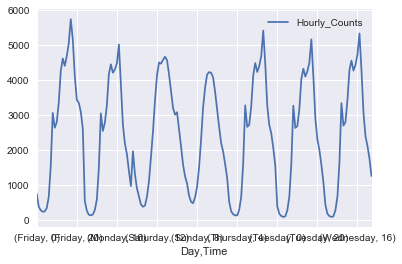

In [6]:
# plot counts by hour for the 'Flinders St-Swanston St (West)' sensor

day_time = df[['Day','Time','Hourly_Counts']][(df['Sensor_Name']=='Flinders St-Swanston St (West)')]

day_time = day_time.groupby(['Day','Time']).mean()

day_time.plot()

In [7]:
daytime = df[
    
(df['Sensor_Name']=='Flinders St-Swanston St (West)') 
    
][['Time','Day','Hourly_Counts']].groupby(['Time','Day']).mean().unstack('Day')

daytime

Hourly_Counts                                                      \
Day         Friday       Monday     Saturday       Sunday     Thursday   
Time                                                                     
0       755.559633   540.445455  1966.836364  2103.809091   526.745455   
1       385.779817   264.581818  1310.327273  1583.281818   251.663636   
2       278.174312   151.218182   904.918182  1249.046729   162.300000   
3       235.688073   131.945455   680.090909  1043.645455   133.600000   
4       243.577982   157.372727   444.345455   696.754545   130.190909   
5       338.165138   287.090909   378.263636   518.700000   286.527273   
6       657.917431   587.390909   410.154545   478.045455   653.581818   
7      1534.972477  1489.181818   665.700000   651.581818  1621.809091   
8      3064.302752  3049.963636  1111.327273   948.927273  3279.881818   
9      2639.018349  2545.336364  1801.045455  1515.590909  2662.927273   
10     2798.146789  2780.381818  2532.900000  2303.690909  2725.490909   
11     3348.697248  3279.327273  3418.754545  3217.136364  3244.563636   
12     4255.623853  4172.500000  4135.090909  3789.181818  4136.245455   
13     4620.211009  4451.718182  4504.272727  4162.154545  4489.272727   
14     4408.495413  4212.500000  4471.909091  4229.154545  4233.900000   
15     4684.853211  4305.245455  4576.072727  4210.372727  4402.790909   
16     5052.605505  4475.663636  4670.372727  4078.009091  4688.772727   
17     5742.082569  5019.890909  4574.100000  3659.581818  5416.536364   
18     5168.302752  3847.518182  4170.700000  3147.936364  4473.754545   
19     4120.321101  2727.145455  3684.172727  2657.663636  3271.554545   
20     3443.275229  2181.727273  3205.263636  2200.563636  2723.490909   
21     3346.238532  1882.990909  3011.581818  1954.472727  2480.645455   
22     3095.376147  1401.381818  3082.681818  1598.227273  2065.345455   
23     2608.412844   971.481818  2601.990909  1200.918182  1561.190909   

                                
Day       Tuesday    Wednesday  
Time                            
0      395.064220   432.431193  
1      177.816514   180.174312  
2      112.082569   111.064220  
3       88.045872    87.605505  
4      105.311927   104.027523  
5      274.678899   278.605505  
6      659.321101   665.770642  
7     1598.880734  1636.770642  
8     3269.899083  3341.844037  
9     2635.486239  2698.889908  
10    2684.522936  2798.788991  
11    3158.165138  3433.495413  
12    4033.816514  4292.963303  
13    4326.211009  4557.935780  
14    4101.917431  4274.495413  
15    4257.623853  4428.486239  
16    4495.440367  4736.935780  
17    5166.889908  5336.055046  
18    4103.174312  4281.357798  
19    2902.844037  3067.385321  
20    2307.577982  2388.944954  
21    2007.174312  2114.779817  
22    1581.045872  1749.422018  
23    1082.256881  1258.201835

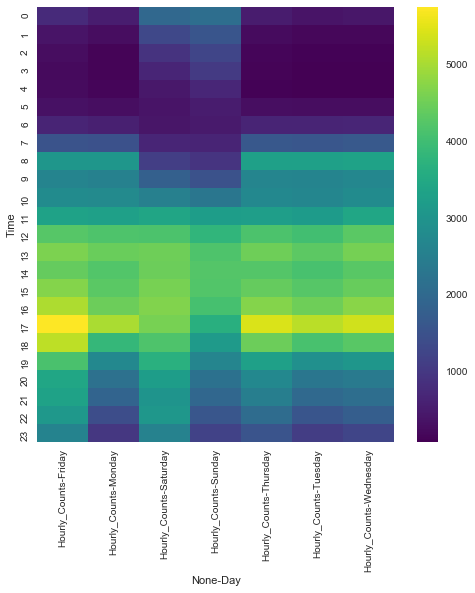

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(daytime, cmap='viridis')